In [1]:
# import the library
%matplotlib inline

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test  = pd.read_csv('data/test.csv')


In [3]:
df_train_corr = df_test.corr()
#df_train_corr

In [4]:
#fig, ax = plt.subplots(figsize=(12,10))
#sns.heatmap(df_train_corr, annot=True)

In [5]:
#print(df_train.columns)
#df_train.head(2)

## Feature Engineering

In [6]:
df_train_zip = pd.get_dummies(df_train['zipcode'])
df_test_zip = pd.get_dummies(df_test['zipcode'])

In [7]:
df_train_zip.shape

(51000, 732)

In [8]:
df_test_zip.shape

(23111, 668)

In [9]:
#df_zip.to_csv('zip.csv', index=False)
zip_train = df_train_zip.columns
zip_test = df_test_zip.columns

In [10]:
zip_train.size

732

In [11]:
zip_test.size

668

In [12]:
sum(map(lambda x: 1, zip_train))

732

In [13]:
sum(map(lambda x: 1, zip_test))

668

In [14]:
zip_col_train = []
zip_col_train_bad = []
lenlist = zip_train.size
for i in range(0,lenlist):
    if zip_train[i].isdigit():
        zip_col_train.append(zip_train[i])
    else:
        zip_col_train_bad.append(zip_train[i])

In [15]:
#zip_col_train

In [16]:
zip_col_test = []
zip_col_test_bad = []
lenlist = zip_test.size
for i in range(0,lenlist):
    if zip_test[i].isdigit():
        zip_col_test.append(zip_test[i])
    else:
        zip_col_test_bad.append(zip_test[i])

In [17]:
#zip_col_test

In [18]:
sum(map(lambda x: 1, zip_col_train))
#zip_col_test.size

619

In [19]:
sum(map(lambda x: 1, zip_col_test))

581

In [20]:
zip_union =set(zip_col_train).union(zip_col_test)

In [21]:
sum(map(lambda x: 1, zip_union))

639

In [22]:
zip_intersection = set(zip_col_train).intersection(zip_col_test)

In [23]:
sum(map(lambda x: 1, zip_intersection))

561

In [24]:
#zip_union.remove('02143')
#zip_union.remove('02163')
#zip_union.remove('02458')
#zip_union.remove('02472')
#zip_union.remove('10279')
#zip_union.remove('11228')
#zip_union.remove('20229')
#zip_union.remove('20781')
#zip_union.remove('20815')
#zip_union.remove('60302')
#zip_union.remove('60603')
#zip_union.remove('60633')
#zip_union.remove('60805')
#zip_union.remove('90201')
#zip_union.remove('90840')
#zip_union.remove('91351')
#zip_union.remove('91377')
#zip_union.remove('93105')
#zip_union.remove('94401')
#zip_union.remove('99135')

In [25]:
sum(map(lambda x: 1, zip_intersection))

561

In [26]:
Zip_Columns = list(zip_intersection)
#X_columns = ['accommodates', 'bedrooms','bathrooms','beds','longitude','latitude'] + list(zip_intersection)

In [27]:
type(Zip_Columns)

list

In [28]:
len(Zip_Columns)

561

In [29]:
df_train_zip_clean = df_train_zip.iloc[:][Zip_Columns]

In [30]:
# sns.pairplot(df_train_zip_clean)

In [31]:
df_train_zip_clean.shape

(51000, 561)

In [32]:
new_df_train = pd.concat([df_train, df_train_zip_clean], axis=1).fillna(0.0)

In [33]:
new_df_train.shape

(51000, 590)

In [34]:
y_column = ['log_price']

In [35]:
X_columns = ['accommodates','longitude', 'latitude', 'bedrooms','bathrooms','beds'] + list(Zip_Columns)

In [36]:
len(X_columns)

567

In [37]:
#sns.pairplot(df_main1)

In [38]:
new_df_train.isnull().values.any()

False

## Model Training


In [39]:
new_df_train = new_df_train.sample(frac=1).reset_index(drop=True)
#new_df_train.head()
new_df_train.shape

(51000, 590)

In [40]:
threshold = 0.8
absolute_threshold = int(len(new_df_train)*threshold)
print(absolute_threshold)

40800


In [41]:
#X_columns

In [42]:
X_train = new_df_train.iloc[:absolute_threshold][X_columns]
y_train = new_df_train.iloc[:absolute_threshold][y_column]

#X_test = new_df_test.iloc[absolute_threshold:][X_columns]
#y_test = new_df_test.iloc[absolute_threshold:][y_column]
print('X_train', X_train.shape)
print('y_train', y_train.shape)
#print('X_test', X_test.shape)
#print('y_test', y_test.shape)


X_train (40800, 567)
y_train (40800, 1)


In [43]:
X = new_df_train[X_columns]
y = new_df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

In [44]:
#X.head()
X.shape

(51000, 567)

In [45]:
y.shape
#y.head()

(51000, 1)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
print(model.intercept_)

[-0.72225913]


In [48]:
#print(model.coef_)

In [49]:
print("Training_score : ", model.score(X_train, y_train))

Training_score :  0.5296678242158313


In [50]:
yy_test = y_test.as_matrix()

C:\Users\plav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [51]:
#for i in range(len(X_test)):
for i in range(10):
    print("predicted : ", y_pred[i], "    actual : ",yy_test[i] )

predicted :  [4.73660268]     actual :  [4.55387689]
predicted :  [4.45815387]     actual :  [4.00733319]
predicted :  [4.88750467]     actual :  [4.4308168]
predicted :  [7.16968696]     actual :  [6.90775528]
predicted :  [4.55274324]     actual :  [3.80666249]
predicted :  [4.47056268]     actual :  [4.31748811]
predicted :  [4.31501129]     actual :  [4.70048037]
predicted :  [4.6098064]     actual :  [4.09434456]
predicted :  [4.68699614]     actual :  [4.44265126]
predicted :  [4.98878031]     actual :  [6.2146081]


## Model Evaluation

RMSE 0.48715296643226397
MAE 0.37


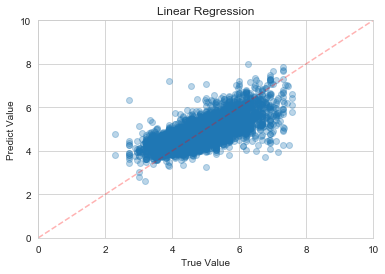

In [52]:
mae = mean_absolute_error(y_test, y_pred)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', round(mae, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

## Load test.csv

In [53]:
#df_test  = pd.read_csv('data/test.csv')
print(df_test.columns)

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


In [54]:
df_test.shape

(23111, 28)

In [55]:
#df_test_zip = pd.get_dummies(df_test['zipcode'])
#df_test_zip.head()

In [56]:
#new_df_test_zip = df_test_zip.iloc[:][newlist]

In [57]:
X_columns = ['accommodates','longitude', 'latitude', 'bedrooms','bathrooms','beds'] + Zip_Columns
#X_columns = list(zip_intersection)
#X_columns = list(zip_union)

In [58]:
#X_columns

In [59]:
df_test_zip_clean = df_test_zip.iloc[:][Zip_Columns]

In [60]:
df_test = pd.concat([df_test, df_test_zip_clean], axis=1).fillna(0.0)

In [61]:
df_test.shape

(23111, 589)

In [62]:
#print(df_test.columns)

In [63]:
df_test.shape

(23111, 589)

In [64]:
#df_test.head()

In [65]:
#X_columns = ['accommodates','longitude', 'latitude', 'bedrooms','bathrooms','beds']

In [66]:
sum(map(lambda x: 1, X_columns))

567

In [67]:
#X_train = df.iloc[:][X_columns]

In [68]:
#print (X_columns)
#print (y_column)

In [69]:
#X_train = df.iloc[:absolute_threshold][X_columns]

In [70]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

X_train (40800, 567)
y_train (40800, 1)


In [71]:
sum(map(lambda x: 1, X_columns))

567

In [72]:
# (23111, 588)
#X_train = df_test.iloc[:][X_columns]

In [73]:
X_train.shape

(40800, 567)

In [74]:
y_train.shape

(40800, 1)

In [75]:
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_test (10200, 567)
y_test (10200, 1)


In [76]:
#X_columns

In [77]:
#X_columns

In [78]:
#XX_test = df_test.iloc[:][X_columns]

In [79]:
#df_test.to_csv('zip_bad.csv', index=False)

In [80]:
XX_test = df_test.iloc[:][X_columns]

In [81]:
XX_test.shape

(23111, 567)

In [82]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

print('XX_test : ', XX_test.shape)

X_train (40800, 567)
y_train (40800, 1)
X_test (10200, 567)
y_test (10200, 1)
XX_test :  (23111, 567)


In [83]:
#print(X_test.columns)
#y_pred = model.predict(X_test)

In [84]:
XX_test.head()

,accommodates,longitude,latitude,bedrooms,bathrooms,beds,94110,60606,60652,90605,...,60602,02145,60629,90815,91106,10010,20012,94132,11366,90056
0,2,-73.949911,40.830190,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,-77.028447,38.923224,1.0,1.5,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-73.953039,40.668250,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-73.952920,40.668870,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-73.906845,40.741597,2.0,1.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X_test.shape

(10200, 567)

In [86]:
XX_test.shape

(23111, 567)

In [87]:
#yy_pred.shape

In [88]:
yy_pred = model.predict(XX_test)

In [89]:
X_train.head()

,accommodates,longitude,latitude,bedrooms,bathrooms,beds,94110,60606,60652,90605,...,60602,02145,60629,90815,91106,10010,20012,94132,11366,90056
48758,2,-73.962587,40.652571,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19850,6,-118.140987,33.780060,2.0,1.0,3.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32853,2,-73.937839,40.625675,0.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,3,-76.989086,38.856523,3.0,2.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39754,4,-118.335845,33.859059,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y_train.head()

,log_price
48758,4.094345
19850,5.123964
32853,4.317488
27996,5.010635
39754,4.317488


In [91]:
X_test.head()

,accommodates,longitude,latitude,bedrooms,bathrooms,beds,94110,60606,60652,90605,...,60602,02145,60629,90815,91106,10010,20012,94132,11366,90056
38552,2,-73.985317,40.682894,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9898,1,-73.993084,40.666827,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12346,2,-71.068740,42.360486,0.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44340,16,-73.982636,40.714288,2.0,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19662,2,-122.424927,37.730739,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
model_test = LinearRegression()

In [93]:
model_test.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
y_pred = model_test.predict(XX_test)

In [95]:
y_test.shape

(10200, 1)

In [96]:
num_rows = df_test.shape[0]
print(num_rows)

23111


In [97]:
yy_test = df_train.iloc[0:num_rows][y_column]

In [98]:
yy_test.shape

(23111, 1)

In [99]:
y_pred.shape

(23111, 1)

In [100]:
yy_pred.shape

(23111, 1)

RMSE 0.8813862079587125
MAE 0.37


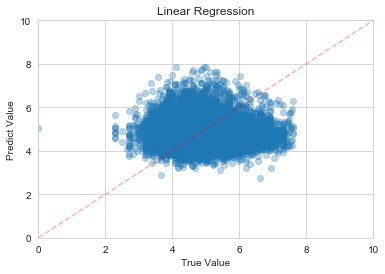

In [101]:
mae_test = mean_absolute_error(yy_test, yy_pred)
print('RMSE', np.sqrt(mean_squared_error(yy_test, yy_pred)))
print('MAE', round(mae, 2))
plt.scatter(yy_test, yy_pred, alpha=0.3)
plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

In [102]:
#y_test = df.iloc[absolute_threshold:][y_column]
print('yy_test', yy_test.shape)

yy_test (23111, 1)


In [103]:
print("Training_score : ", model_test.score(X_train, y_train))

Training_score :  0.5296678242158313


In [104]:
yy_test_m = yy_test.as_matrix()
#for i in range(len(X_test)):
for i in range(10):
    print("predicted : ", y_pred[i], "    actual : ",yy_test_m[i] )

predicted :  [4.28344168]     actual :  [3.80666249]
predicted :  [5.09493211]     actual :  [4.94164242]
predicted :  [4.44262099]     actual :  [4.94164242]
predicted :  [4.59940691]     actual :  [4.86753445]
predicted :  [4.89338676]     actual :  [3.66356165]
predicted :  [5.01813582]     actual :  [4.83628191]
predicted :  [4.10294442]     actual :  [5.22035583]
predicted :  [5.66896734]     actual :  [5.68697536]
predicted :  [4.67551858]     actual :  [3.55534806]
predicted :  [4.5297476]     actual :  [4.2341065]


C:\Users\plav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## Prepare submission

In [105]:
df_prediction = df_test[X_columns].fillna(0.0)

In [106]:
df_prediction.head()

,accommodates,longitude,latitude,bedrooms,bathrooms,beds,94110,60606,60652,90605,...,60602,02145,60629,90815,91106,10010,20012,94132,11366,90056
0,2,-73.949911,40.830190,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,-77.028447,38.923224,1.0,1.5,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-73.953039,40.668250,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-73.952920,40.668870,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-73.906845,40.741597,2.0,1.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_test['log_price'] = model.predict(df_prediction)

In [108]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression10.csv', index=False)